# Final Report for Machine Learning Project
This report is being prepared for the technical interview round

In [1]:
# Importing libraries
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Task 1
Data exploration for `'targets.csv'`

In [2]:
# Reading 'targets.csv' as a pandas dataframe in jupyter-notebook
targets = pd.read_csv('targets.csv')

# Printing first 5 row values in the dataframe
targets.head()

site_id  year                 treatment  yield_bu_acre  plantN_lb_acre
0        6  2017      Reduced N fertilizer          153.5           164.8
1        6  2017  Grower Standard Practice          157.2           178.1
2       24  2017      Reduced N fertilizer          153.9           162.3
3       24  2017  Grower Standard Practice          158.1           177.7
4       26  2018      Reduced N fertilizer          181.1           156.7

In [3]:
# Getting information about the dataset and checking for null values in the dataset
targets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   site_id         800 non-null    int64  
 1   year            800 non-null    int64  
 2   treatment       800 non-null    object 
 3   yield_bu_acre   800 non-null    float64
 4   plantN_lb_acre  800 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 31.4+ KB


### We need to Re-format the dataframe and play around with the data to generate the expected target trait responses from Original data

In [4]:
# Check how many unique observation sites are present in the original 'targets.csv'
unique = np.unique(targets['site_id'])
unique_len = len(unique)
print(unique_len)

400


So we see that there are 400 unique observation sites and we will modify our dataframe in such a way that it stores the target responses from each site

Approach - Create two new lists and store the expected target trait response ('Yield bushel/acre' and 'Plant Nlb/acre') values in them

In [5]:
Yield = []
Nitrogen = []
for i in range(1, len(targets), 2): # run a for loop to generate target responses for each unique site
    Yield.append(round(targets['yield_bu_acre'][i] - targets['yield_bu_acre'][i-1], 2))
    Nitrogen.append(round(targets['plantN_lb_acre'][i] - targets['plantN_lb_acre'][i-1], 2))

In [6]:
# print out the new target responses
for i in range(0, len(Yield)):
    print(Yield[i], ' ', Nitrogen[i])

3.7   13.3
4.2   15.4
-13.3   -4.5
3.5   12.5
6.0   20.4
9.6   20.2
5.1   15.5
3.0   14.1
3.1   12.9
8.8   11.9
4.9   12.8
3.7   10.2
-0.4   2.0
1.2   6.3
2.4   11.7
1.2   6.1
5.2   18.6
11.1   12.7
-17.0   -6.9
14.7   18.0
0.31   11.6
3.0   6.4
-1.4   1.9
7.6   22.4
5.0   5.9
4.3   14.3
1.7   9.2
3.8   15.4
0.3   11.6
4.1   17.3
-9.2   -3.2
-21.6   -9.9
0.4   14.3
-5.6   -1.6
3.5   15.4
-0.3   12.4
1.1   12.0
-3.6   -4.0
3.6   13.3
-9.8   -6.4
5.2   5.7
0.0   3.1
7.2   11.8
0.6   4.2
1.1   11.3
-0.6   2.1
4.1   8.0
5.0   8.7
3.3   3.3
2.6   8.9
7.5   9.4
-8.6   -1.7
-5.6   -3.9
3.4   12.2
1.7   11.5
2.3   13.3
4.0   6.0
5.0   19.9
4.5   10.9
2.6   21.7
0.6   2.9
6.4   6.7
2.3   5.7
4.8   7.8
9.1   10.1
-0.8   -0.6
0.2   2.1
1.9   4.1
4.5   6.2
12.7   11.8
0.1   5.3
1.0   1.7
1.2   7.2
1.1   7.3
9.5   11.1
0.4   4.0
0.1   4.6
0.0   3.5
3.3   4.7
1.1   6.2
6.6   14.2
0.8   2.3
1.4   10.3
12.9   12.7
4.9   7.0
10.8   12.1
3.1   3.5
1.4   2.5
3.1   8.3
2.1   3.1
0.3   2.3
9.4   9.2
0.5   

In [7]:
len(Yield)

400

### Modifying the dataframe
So we will update the targets dataframe in such a way that it includes only the Unique `'site_id'`, and the target responses i.e. `'Yield_BuAcre'` and `'Nitro_lbAcre'`

In [8]:
# Displaying the original 'targets' dataframe
targets.head()

site_id  year                 treatment  yield_bu_acre  plantN_lb_acre
0        6  2017      Reduced N fertilizer          153.5           164.8
1        6  2017  Grower Standard Practice          157.2           178.1
2       24  2017      Reduced N fertilizer          153.9           162.3
3       24  2017  Grower Standard Practice          158.1           177.7
4       26  2018      Reduced N fertilizer          181.1           156.7

In [9]:
# Now, we will remove the alternate site_id's from the dataframe

for i in range(0, len(targets), 2): # run  a loop to eliminate alternate site_id's
    targets.drop(i, inplace = True)
targets.head()

site_id  year                 treatment  yield_bu_acre  plantN_lb_acre
1        6  2017  Grower Standard Practice          157.2           178.1
3       24  2017  Grower Standard Practice          158.1           177.7
5       26  2018  Grower Standard Practice          167.8           152.2
7       42  2017  Grower Standard Practice          161.4           179.8
9       60  2017  Grower Standard Practice          168.6           168.6

In [10]:
# We can see that how many observation sites were observed per/year
targets['year'].value_counts()

2017    210
2018    190
Name: year, dtype: int64

We see that the total number of observed sites in `2017` were `210` and `190` in `2018`

In [11]:
# Removing 2 columns ['treatment'] from the dataframe 
targets.drop('treatment', axis = 1, inplace = True)
targets.head()

site_id  year  yield_bu_acre  plantN_lb_acre
1        6  2017          157.2           178.1
3       24  2017          158.1           177.7
5       26  2018          167.8           152.2
7       42  2017          161.4           179.8
9       60  2017          168.6           168.6

In [12]:
targets.shape

(400, 4)

We see that there is an issue with the index values in the dataframe that we have modified, we will first rectify that and then update the new target responses for our target values in the dataframe

In [13]:
targets = targets.reset_index() # Resets the index

targets.drop('index', axis = 1, inplace=True) # To delete the column that is formed for the old index values in the dataframe
targets.head()

site_id  year  yield_bu_acre  plantN_lb_acre
0        6  2017          157.2           178.1
1       24  2017          158.1           177.7
2       26  2018          167.8           152.2
3       42  2017          161.4           179.8
4       60  2017          168.6           168.6

In [14]:
# Update the target response values in the dataframe
targets['yield_bu_acre'] = Yield
targets['plantN_lb_acre'] = Nitrogen
targets.head()

site_id  year  yield_bu_acre  plantN_lb_acre
0        6  2017            3.7            13.3
1       24  2017            4.2            15.4
2       26  2018          -13.3            -4.5
3       42  2017            3.5            12.5
4       60  2017            6.0            20.4

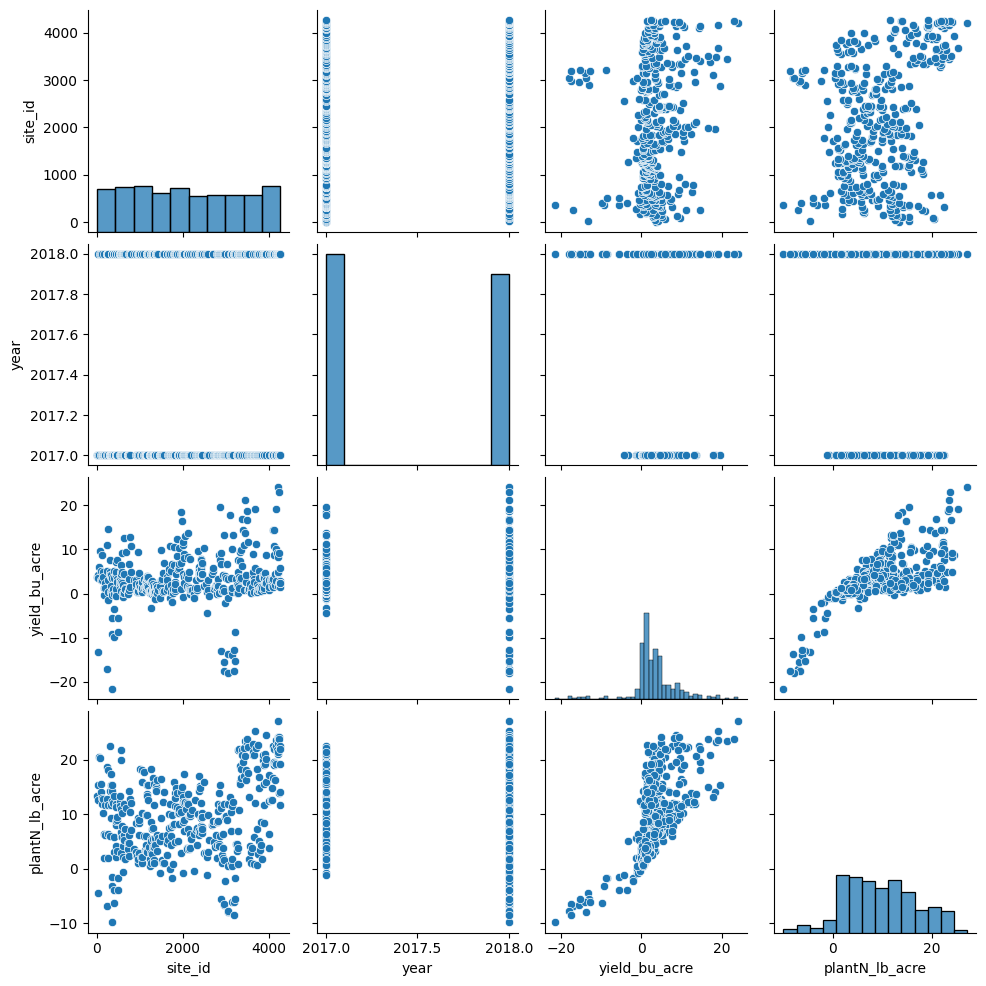

In [15]:
# Performing visualization on the updated dataframe
sns.pairplot(targets)

We observe that we cannot extract much information out of the above 'pairplot' so we see the results for different years i.e. 2017 and 2018

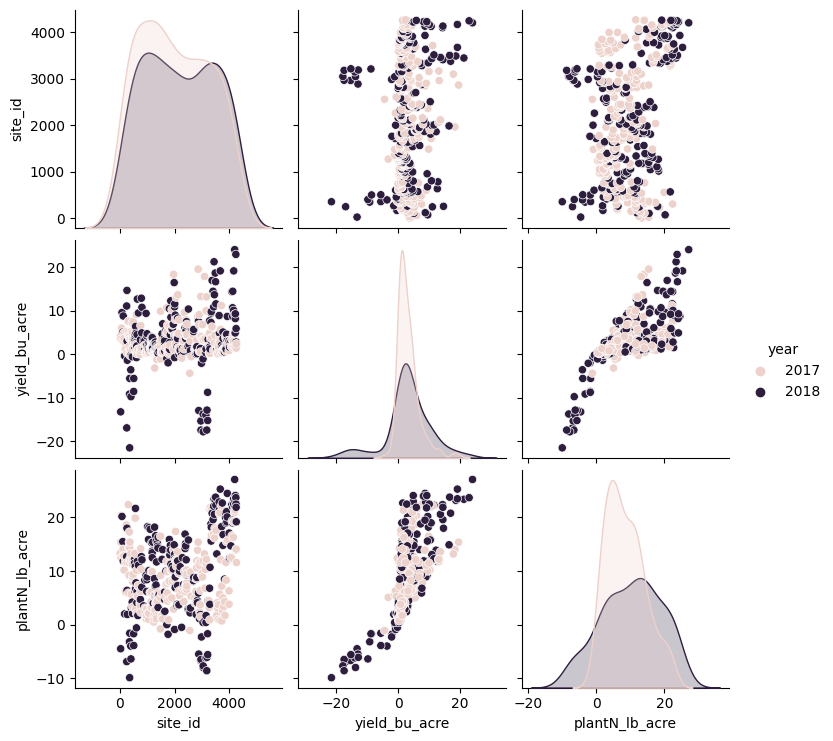

In [16]:
# Performing visualization on the updated dataframe
sns.pairplot(targets, hue = 'year')

<Figure size 1000x1000 with 0 Axes>

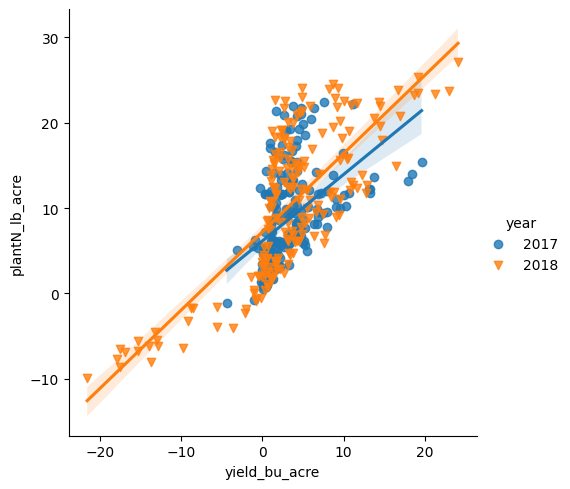

In [17]:
plt.figure(figsize=(10,10))
sns.lmplot(x = 'yield_bu_acre', y = 'plantN_lb_acre', data = targets, hue = 'year', markers=['o', 'v'])
plt.show()

<Figure size 1000x1000 with 0 Axes>

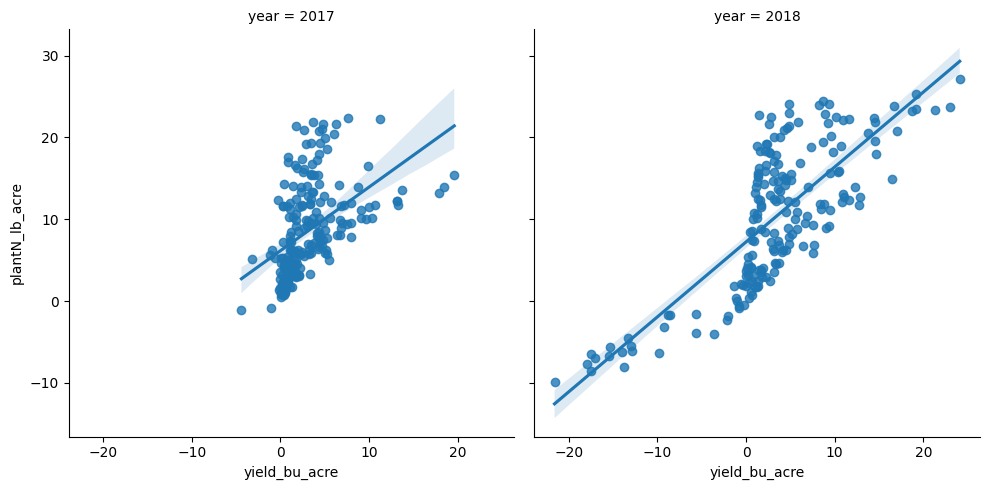

In [18]:
plt.figure(figsize=(10,10))
sns.lmplot(x = 'yield_bu_acre', y = 'plantN_lb_acre', data = targets, col= 'year')
plt.show()

## Analysis
1. Determing the yield figures at the observed sites for 2 different year:
- We see that for the year 2017, most of the target responses lie around 0 which states that there is not much difference between the yields done in observed sites using two different approaches
- Similarly, we observe many outliers in the yield values amongst sites observed during 2018 thesehave a high absolute values between the yields that were observed using two different practises at the obseved sites
2. Determing the plantN_lbacre at observed sites for 2 different years:
- We observe from the following plots that there was difference between the Nitrogen lb_acre in different observed sites that followed different strategy towards the end of season
- The count of outliers with greater absolute values (i.e. difference between standard practice and reduced nitrogen approach) are more for the year 2018 as compared to 2017

In [19]:
# Before moving further we will drop the year column from the targets dataframe and merge it with predictors
# dataframe later in the notebook
targets.drop('year', axis = 1, inplace = True)
targets.head()

site_id  yield_bu_acre  plantN_lb_acre
0        6            3.7            13.3
1       24            4.2            15.4
2       26          -13.3            -4.5
3       42            3.5            12.5
4       60            6.0            20.4

### Finally we have our final 'targets' dataframe with target response values

## Task 2 and 3
Data exploration for `'predictors.csv'`

The 'predictors.csv' file consists of features that were observed from all the observation sites during 2017-2018 in Illinois and are included in this table, our main goal for this task would be to play around with data in this file
1. Try to detect and eliminate noise from data
2. Try to handle the `null` values present in the dataset 
3. Try to perform imputation, scaling and see if we can remove certain features that do not contribute significantly in determining the values of target variable

In [20]:
# Loading the 'predictors.csv' file into a dataframe in jupyter-notebook
df = pd.read_csv('predictors.csv')
# Displaying 1-5 entries in the dataframe
df.head()

site_id  year  N_fert_grower  N_fert_reduced  dul_dep  ll15_dep  \
0        6  2017            200             160    601.0     327.0   
1       24  2017            190             150      NaN     335.1   
2       26  2018            220             180    619.0     346.8   
3       42  2017            200             160    609.5     335.5   
4       60  2017            200             160    599.7     326.1   

   root_depth    whc  LAI_max  rain_annual  ...  junk6  junk7  junk8  junk9  \
0      1565.0  274.0    3.164       1064.0  ...   9.68   9.46   8.03     F5   
1      1573.0  272.7      NaN       1008.0  ...    NaN   1.89   8.03     F5   
2      1528.0  272.2    3.106       1469.0  ...   1.94   1.89  20.10    NaN   
3      1558.0  274.0      NaN        964.0  ...   5.81  24.60   4.01     F5   
4      1584.0  273.7    3.174       1145.0  ...   5.81  22.70   4.01     F5   

   junk10  junk11  junk12  junk13  junk14  junk15  
0      F2     NaN     0.0    65.0   122.0      F1  
1      F1     0.0     0.0    40.0   122.0      F1  
2      F1     0.0     0.0    40.0   122.0      F1  
3     NaN     0.0     0.0     NaN   122.0      F1  
4      F2     0.0     0.0     NaN   122.0      F2  

[5 rows x 71 columns]

In [21]:
# Getting information about the dataset and checking for null values in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 71 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   site_id          400 non-null    int64  
 1   year             400 non-null    int64  
 2   N_fert_grower    400 non-null    int64  
 3   N_fert_reduced   400 non-null    int64  
 4   dul_dep          367 non-null    float64
 5   ll15_dep         356 non-null    float64
 6   root_depth       368 non-null    float64
 7   whc              358 non-null    float64
 8   LAI_max          352 non-null    float64
 9   rain_annual      364 non-null    float64
 10  day_sow          362 non-null    float64
 11  swdef_photo_fw   363 non-null    float64
 12  swdef_expan_fw   361 non-null    float64
 13  swdef_pheno_fw   365 non-null    float64
 14  L1               367 non-null    float64
 15  day_v5           357 non-null    float64
 16  sw_dep_v5        355 non-null    float64
 17  biomass_v5      

In [22]:
# We observe that the values in the column ['junk9', 'junk10', 'junk15'] have the dtype -object, 
# it would be helpful to remove these values to train regression model 
df.drop(['junk9', 'junk10', 'junk15'], axis = 1, inplace=True)
df.head()

site_id  year  N_fert_grower  N_fert_reduced  dul_dep  ll15_dep  \
0        6  2017            200             160    601.0     327.0   
1       24  2017            190             150      NaN     335.1   
2       26  2018            220             180    619.0     346.8   
3       42  2017            200             160    609.5     335.5   
4       60  2017            200             160    599.7     326.1   

   root_depth    whc  LAI_max  rain_annual  ...     junk3  junk4  junk5  \
0      1565.0  274.0    3.164       1064.0  ...   94100.0   18.9    NaN   
1      1573.0  272.7      NaN       1008.0  ...  213977.0   30.3    NaN   
2      1528.0  272.2    3.106       1469.0  ...  156400.0   30.3   10.0   
3      1558.0  274.0      NaN        964.0  ...   38950.0   22.7    9.0   
4      1584.0  273.7    3.174       1145.0  ...  200190.0   15.1   12.0   

   junk6  junk7  junk8  junk11  junk12  junk13  junk14  
0   9.68   9.46   8.03     NaN     0.0    65.0   122.0  
1    NaN   1.89   8.03     0.0     0.0    40.0   122.0  
2   1.94   1.89  20.10     0.0     0.0    40.0   122.0  
3   5.81  24.60   4.01     0.0     0.0     NaN   122.0  
4   5.81  22.70   4.01     0.0     0.0     NaN   122.0  

[5 rows x 68 columns]

In [23]:
# Also we could view the details of the dataframe using .describe() method
df.describe()

site_id      year  N_fert_grower  N_fert_reduced     dul_dep  \
count   400.000000   400.000     400.000000      400.000000  367.000000   
mean   2096.420000  2017.475     175.700000      135.700000  585.849319   
std    1264.711301     0.500      29.131282       29.131282   66.013963   
min       6.000000  2017.000     100.000000       60.000000  240.400000   
25%    1027.750000  2017.000     160.000000      120.000000  571.150000   
50%    2016.000000  2017.000     180.000000      140.000000  606.300000   
75%    3194.500000  2018.000     200.000000      160.000000  619.250000   
max    4268.000000  2018.000     280.000000      240.000000  690.500000   

         ll15_dep   root_depth         whc     LAI_max  rain_annual  ...  \
count  356.000000   368.000000  358.000000  352.000000   364.000000  ...   
mean   328.308427  1910.282609  257.983520    3.215980  1059.384615  ...   
std     63.628257   151.953605   35.241361    0.247603   161.364278  ...   
min    103.600000  1520.000000  102.900000    2.191000   763.000000  ...   
25%    309.625000  1894.500000  244.750000    3.139750   935.750000  ...   
50%    331.450000  2000.000000  267.900000    3.222500  1045.500000  ...   
75%    353.375000  2000.000000  281.200000    3.387250  1149.750000  ...   
max    512.800000  2000.000000  358.400000    3.572000  1617.000000  ...   

               junk3       junk4       junk5       junk6       junk7  \
count     360.000000  356.000000  367.000000  355.000000  344.000000   
mean   188909.080556   21.399831   10.062670    6.901155   12.789448   
std     99133.639906    7.373548    2.471454    2.902870    7.463506   
min     26987.000000    1.890000    2.000000    1.940000    1.890000   
25%    120169.500000   18.900000    9.000000    5.810000    5.670000   
50%    179032.500000   22.700000   10.000000    5.810000   13.200000   
75%    233436.500000   24.600000   12.000000    9.680000   18.900000   
max    599629.000000   30.300000   16.000000   13.600000   26.500000   

            junk8        junk11       junk12      junk13      junk14  
count  359.000000    367.000000   356.000000  356.000000  348.000000  
mean     9.724373    588.888283   112.036517   41.084270  117.516609  
std      6.578743   5452.356000   451.744601   11.646613   18.058583  
min      4.010000      0.000000     0.000000    4.000000    6.570000  
25%      4.010000      0.000000     0.000000   40.000000  122.000000  
50%      8.030000      0.000000     0.000000   40.000000  122.000000  
75%     16.100000      0.000000     0.000000   45.000000  122.000000  
max     24.100000  99999.000000  2824.000000   99.000000  128.000000  

[8 rows x 68 columns]

In [24]:
# We see that there are a lot of null values in the dataset
# Calulating how many null values are there per/column
print(df.isnull().sum()) # Each feature

site_id            0
year               0
N_fert_grower      0
N_fert_reduced     0
dul_dep           33
                  ..
junk8             41
junk11            33
junk12            44
junk13            44
junk14            52
Length: 68, dtype: int64


In [25]:
print(df.isnull().sum().sum()) # in the whole dataset

2580


In [26]:
# the total percentage of data that does not have values or are null are
print('The %age of null values in the dataframe are: ', df.isnull().sum().sum()*100/(df.shape[0]*df.shape[1]))

The %age of null values in the dataframe are:  9.485294117647058


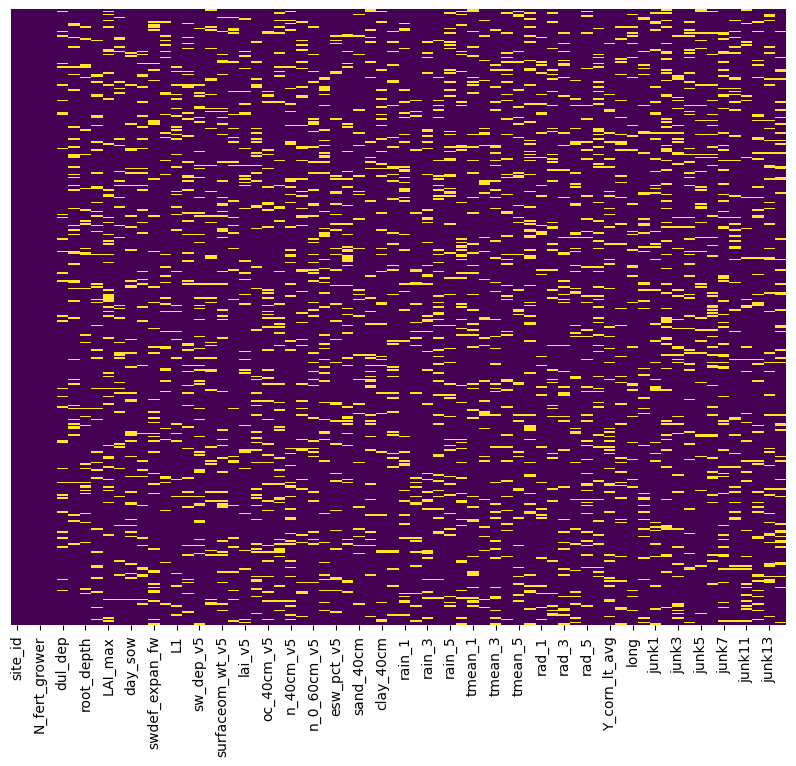

In [27]:
# Visualizing number of null values in the dataframe
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')
plt.show()

We observe that the null values are present randomnly in most of the columns and there no specific column in a dataset that consists of significantly large number of null values, so we cannot consider removing columns based on large number of null values
- We will need to work on a strategy to fill in these null values in the dataframe

<b>We will merge the predictors dataframe and the targets dataframe and perform the analysis on the new dataframe hereafter</b>

In [28]:
# Updating the original df dataframe into a new dataframe
df = pd.merge(df, targets, on = 'site_id')
df.head()

site_id  year  N_fert_grower  N_fert_reduced  dul_dep  ll15_dep  \
0        6  2017            200             160    601.0     327.0   
1       24  2017            190             150      NaN     335.1   
2       26  2018            220             180    619.0     346.8   
3       42  2017            200             160    609.5     335.5   
4       60  2017            200             160    599.7     326.1   

   root_depth    whc  LAI_max  rain_annual  ...  junk5  junk6  junk7  junk8  \
0      1565.0  274.0    3.164       1064.0  ...    NaN   9.68   9.46   8.03   
1      1573.0  272.7      NaN       1008.0  ...    NaN    NaN   1.89   8.03   
2      1528.0  272.2    3.106       1469.0  ...   10.0   1.94   1.89  20.10   
3      1558.0  274.0      NaN        964.0  ...    9.0   5.81  24.60   4.01   
4      1584.0  273.7    3.174       1145.0  ...   12.0   5.81  22.70   4.01   

   junk11  junk12  junk13  junk14  yield_bu_acre  plantN_lb_acre  
0     NaN     0.0    65.0   122.0            3.7            13.3  
1     0.0     0.0    40.0   122.0            4.2            15.4  
2     0.0     0.0    40.0   122.0          -13.3            -4.5  
3     0.0     0.0     NaN   122.0            3.5            12.5  
4     0.0     0.0     NaN   122.0            6.0            20.4  

[5 rows x 70 columns]

### Removing noise and na values in the dataframe

In [29]:
df.head()

site_id  year  N_fert_grower  N_fert_reduced  dul_dep  ll15_dep  \
0        6  2017            200             160    601.0     327.0   
1       24  2017            190             150      NaN     335.1   
2       26  2018            220             180    619.0     346.8   
3       42  2017            200             160    609.5     335.5   
4       60  2017            200             160    599.7     326.1   

   root_depth    whc  LAI_max  rain_annual  ...  junk5  junk6  junk7  junk8  \
0      1565.0  274.0    3.164       1064.0  ...    NaN   9.68   9.46   8.03   
1      1573.0  272.7      NaN       1008.0  ...    NaN    NaN   1.89   8.03   
2      1528.0  272.2    3.106       1469.0  ...   10.0   1.94   1.89  20.10   
3      1558.0  274.0      NaN        964.0  ...    9.0   5.81  24.60   4.01   
4      1584.0  273.7    3.174       1145.0  ...   12.0   5.81  22.70   4.01   

   junk11  junk12  junk13  junk14  yield_bu_acre  plantN_lb_acre  
0     NaN     0.0    65.0   122.0            3.7            13.3  
1     0.0     0.0    40.0   122.0            4.2            15.4  
2     0.0     0.0    40.0   122.0          -13.3            -4.5  
3     0.0     0.0     NaN   122.0            3.5            12.5  
4     0.0     0.0     NaN   122.0            6.0            20.4  

[5 rows x 70 columns]

In [30]:
# Checking the co-relation of predictors with the target values and also amongst other features in the dataframe
# Pearson - is the covariance of two variables/ product of std of 2 variables
corr = df.corr(method = 'pearson')

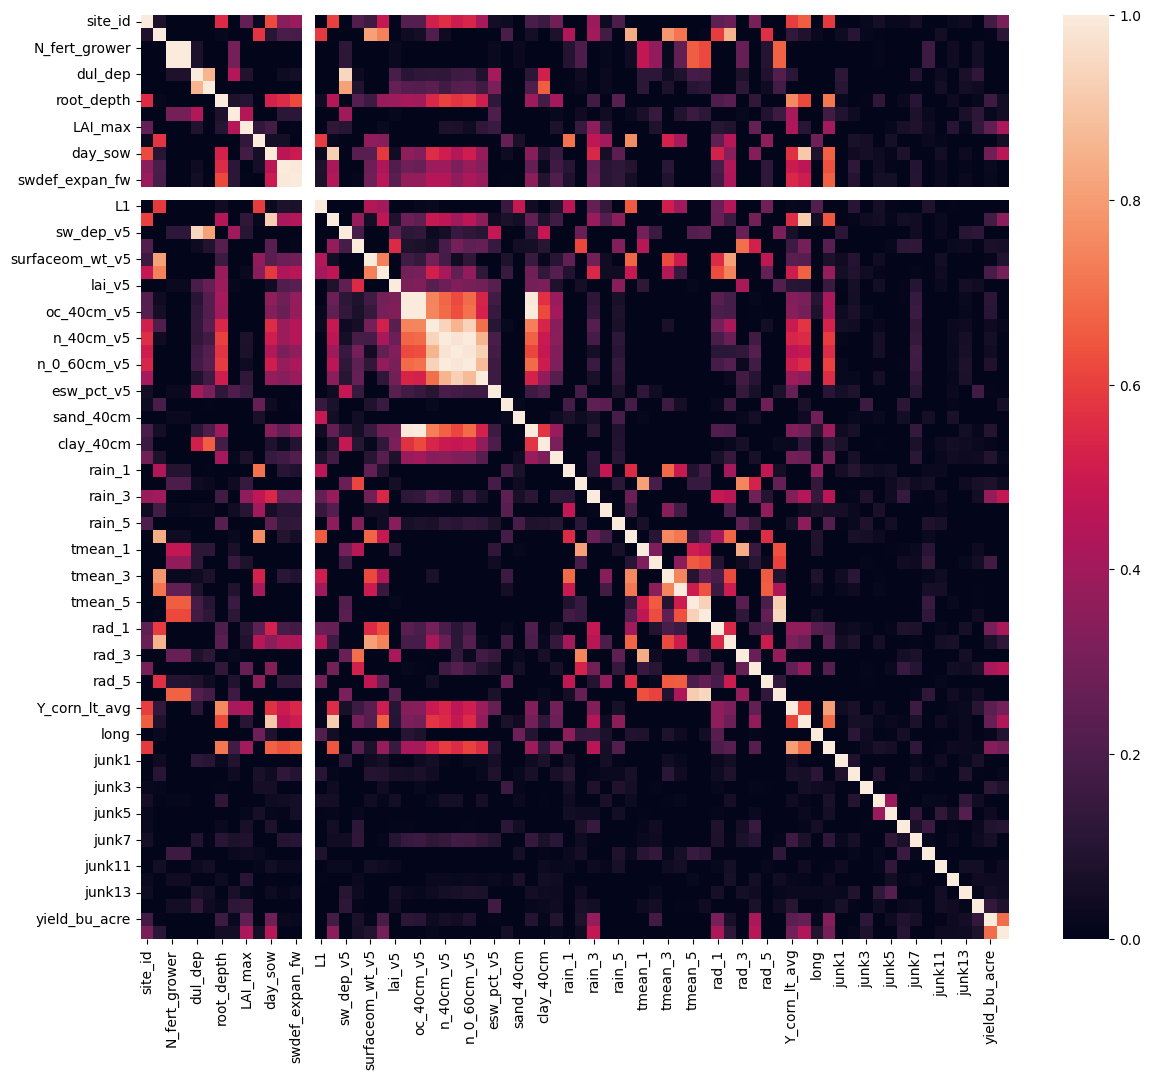

In [31]:
# Visualizing results
plt.figure(figsize = (14,12))
sns.heatmap(corr, vmin = 0, vmax  =1)
plt.show()

From the above co-relation map we can conclude that the junk columns have minimal co-relation to the target feature values ~ 0 and also do not have any co-relation between other features in the predictors dataframe. These features could be removed from the dataset, that will help in reduction of overall features set
Other features that do not have high co-relation between the target variables will also be removed in the next steps 

In [32]:
# Updating the dataframe
df.drop(df.iloc[:, 56:68], axis = 1, inplace = True)
df.head()

site_id  year  N_fert_grower  N_fert_reduced  dul_dep  ll15_dep  \
0        6  2017            200             160    601.0     327.0   
1       24  2017            190             150      NaN     335.1   
2       26  2018            220             180    619.0     346.8   
3       42  2017            200             160    609.5     335.5   
4       60  2017            200             160    599.7     326.1   

   root_depth    whc  LAI_max  rain_annual  ...  rad_3  rad_4  rad_5  rad_6  \
0      1565.0  274.0    3.164       1064.0  ...  22.54  20.27  20.78  12.58   
1      1573.0  272.7      NaN       1008.0  ...  22.73  20.28    NaN  12.51   
2      1528.0  272.2    3.106       1469.0  ...  19.47  17.00  21.95  12.18   
3      1558.0  274.0      NaN        964.0  ...  22.41  20.28  21.26  12.62   
4      1584.0  273.7    3.174       1145.0  ...  22.27  20.49    NaN  12.35   

   Y_corn_lt_avg    lat   long       P  yield_bu_acre  plantN_lb_acre  
0        11820.0  39.15 -88.27  1383.0            3.7            13.3  
1        11930.0  39.04 -88.43  1400.0            4.2            15.4  
2        11330.0  39.06 -88.34  1470.0          -13.3            -4.5  
3        11700.0  39.01    NaN  1425.0            3.5            12.5  
4        11530.0  39.08 -88.02  1496.0            6.0            20.4  

[5 rows x 58 columns]

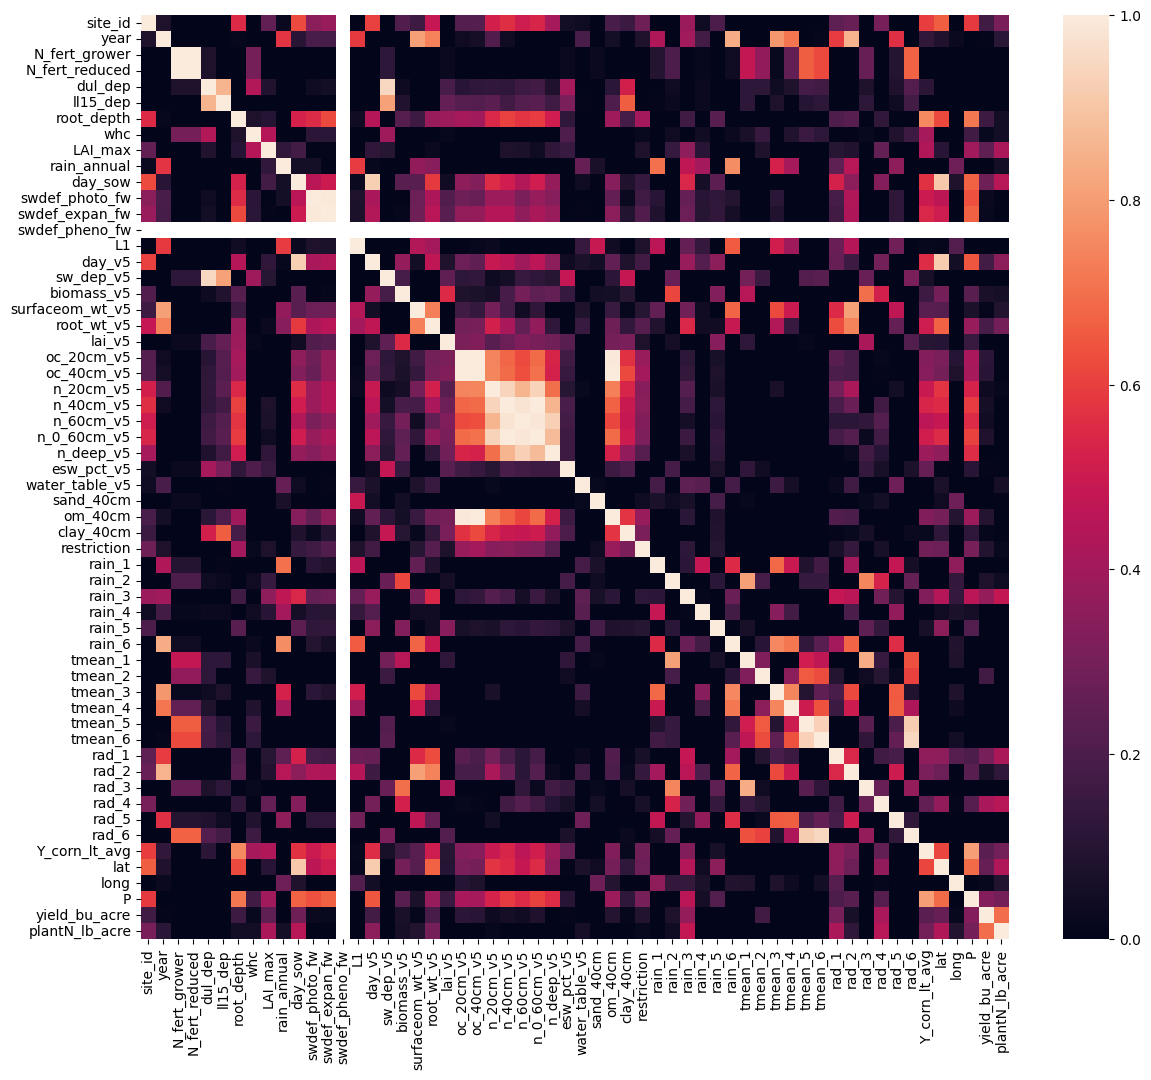

In [33]:
# Checking the pearson co-relations again on the updated dataframe
corr = df.corr(method = 'pearson')
# Visualizing results
plt.figure(figsize = (14,12))
sns.heatmap(corr, vmin = 0, vmax  =1)
plt.show()

From the above co-relation map we can observe co-relation trends. Based on our knowledge related to the dataset we could remove the following features from the dataframe (The feature - reasoning behind excluding that feature is also stated)
- tmean_1:tmean_6- do not have any co-relation with the target feature values (Avg air temperature for different growth stages and different times of the year)
- year: doesn't have any co-relation between the target featuers
- N_fert_grower and N_fert_reduced: As all the fields were treated the same way, GSP - Reduced N fertilizer = 40lbs, this will also not help much in determing the target variables
Other variables that do not have any co-relation with the target variables could be removed from the datframe
The variables are 
- rain_1. rain_2, rain4:rain_6, rain_annual: Total precipitation during different growth stages
- dul_dep: Drained upper limit 
- ll15_dep: Crop lower limit soil water capacity
- root_depth
- whc: Water holding capacity
- swdef_photo,expan,pheno _fw: Mean water stress on expansion, phenology, and photosynthesis around flowering
- L1: Total 2year N leaching
- swdep_v5: Soil water content at v5
- biomass_v5: Biomass content at v5
- surfaceom_wt_v5: Surface residue wt at v5
- n_20cm:n_60cm_v5: Soil N (NO3 and NH4) from 0-x at v5
- oc_20 and _40cm_v5: Soil organic carbon at v5
- lai_v5: Leaf area index at v5
- esw_pct_v5: Extractable soil water at v5
- water_table at v5
- san, om, clay at v5
- restriction: Soil restriction
- rad3, 5, 6: Avg solar radiation during different growth stages
- long - As all the data was collected in the state of Illinois the longitude values are mostly similar to each other

In [34]:
df.drop(df.iloc[:, [1,2,3,4,5,6,7,9,11,12,13,14,16,17,18,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,37,38,39,40,
                    41,42,43,44,45,47,48,50,51,54]], axis = 1, inplace = True)
df.head()

site_id  LAI_max  day_sow  day_v5  root_wt_v5  rain_3  rad_1  rad_4  \
0        6    3.164    102.0   136.0       713.9    64.0  11.67  20.27   
1       24      NaN    101.0   136.0       727.7    75.0  11.63  20.28   
2       26    3.106    102.0   137.0       840.3    52.0  11.29  17.00   
3       42      NaN    101.0   137.0       749.1    64.0  11.50  20.28   
4       60    3.174    101.0   136.0       693.5    61.0  11.64  20.49   

   Y_corn_lt_avg    lat       P  yield_bu_acre  plantN_lb_acre  
0        11820.0  39.15  1383.0            3.7            13.3  
1        11930.0  39.04  1400.0            4.2            15.4  
2        11330.0  39.06  1470.0          -13.3            -4.5  
3        11700.0  39.01  1425.0            3.5            12.5  
4        11530.0  39.08  1496.0            6.0            20.4

### So after checking the co-relation maps between the predictors and target variables we were able to remove the features that were not related to target variables from the dataframe
#### After performing data cleaning we were able to identify `60` junk features from the predictors.csv, we have removed them and the follwoing analysis would be performed on the cleant dataset

In [35]:
df.shape

(400, 13)

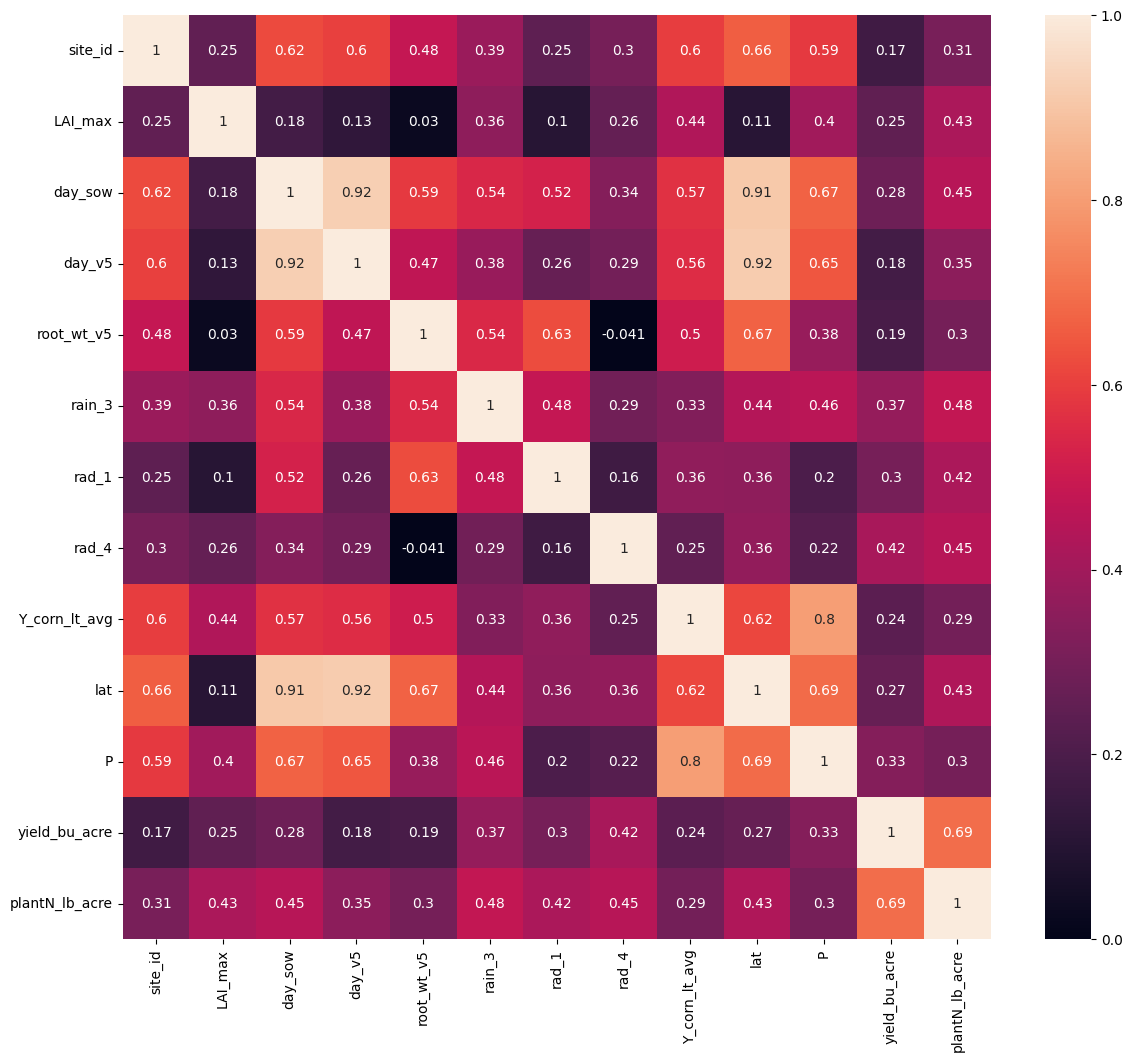

In [36]:
corr = df.corr(method = 'pearson')

# Visualizing results
plt.figure(figsize = (14,12))
sns.heatmap(corr, vmin = 0, vmax = 1, annot = True)
plt.show()

In [37]:
# Checking the total number of null values in the datframe column-feature wise in the dataframe
df.isna().sum()

site_id            0
LAI_max           48
day_sow           38
day_v5            43
root_wt_v5        30
rain_3            40
rad_1             32
rad_4             39
Y_corn_lt_avg     42
lat               36
P                 41
yield_bu_acre      0
plantN_lb_acre     0
dtype: int64

We can handle the missing values by inserting the mean values of all the non-null values in the column

In [38]:
# Removing all the nul values and replacing them by the mean value for that specific column
for i in range(len(df.columns)):
    if df[df.columns[i]].isna().sum() != 0:
        df[df.columns[i]].fillna(df[df.columns[i]].mean(), inplace=True)
df.head()

site_id  LAI_max  day_sow  day_v5  root_wt_v5  rain_3  rad_1  rad_4  \
0        6  3.16400    102.0   136.0       713.9    64.0  11.67  20.27   
1       24  3.21598    101.0   136.0       727.7    75.0  11.63  20.28   
2       26  3.10600    102.0   137.0       840.3    52.0  11.29  17.00   
3       42  3.21598    101.0   137.0       749.1    64.0  11.50  20.28   
4       60  3.17400    101.0   136.0       693.5    61.0  11.64  20.49   

   Y_corn_lt_avg    lat       P  yield_bu_acre  plantN_lb_acre  
0        11820.0  39.15  1383.0            3.7            13.3  
1        11930.0  39.04  1400.0            4.2            15.4  
2        11330.0  39.06  1470.0          -13.3            -4.5  
3        11700.0  39.01  1425.0            3.5            12.5  
4        11530.0  39.08  1496.0            6.0            20.4

In [39]:
# Printing null value in the updated dataframe
df.isnull().sum().sum()

0

So now there are no null values in the dataset

Visualizing a clustermap after the null values have been removed from the dataset

<Figure size 1400x1200 with 0 Axes>

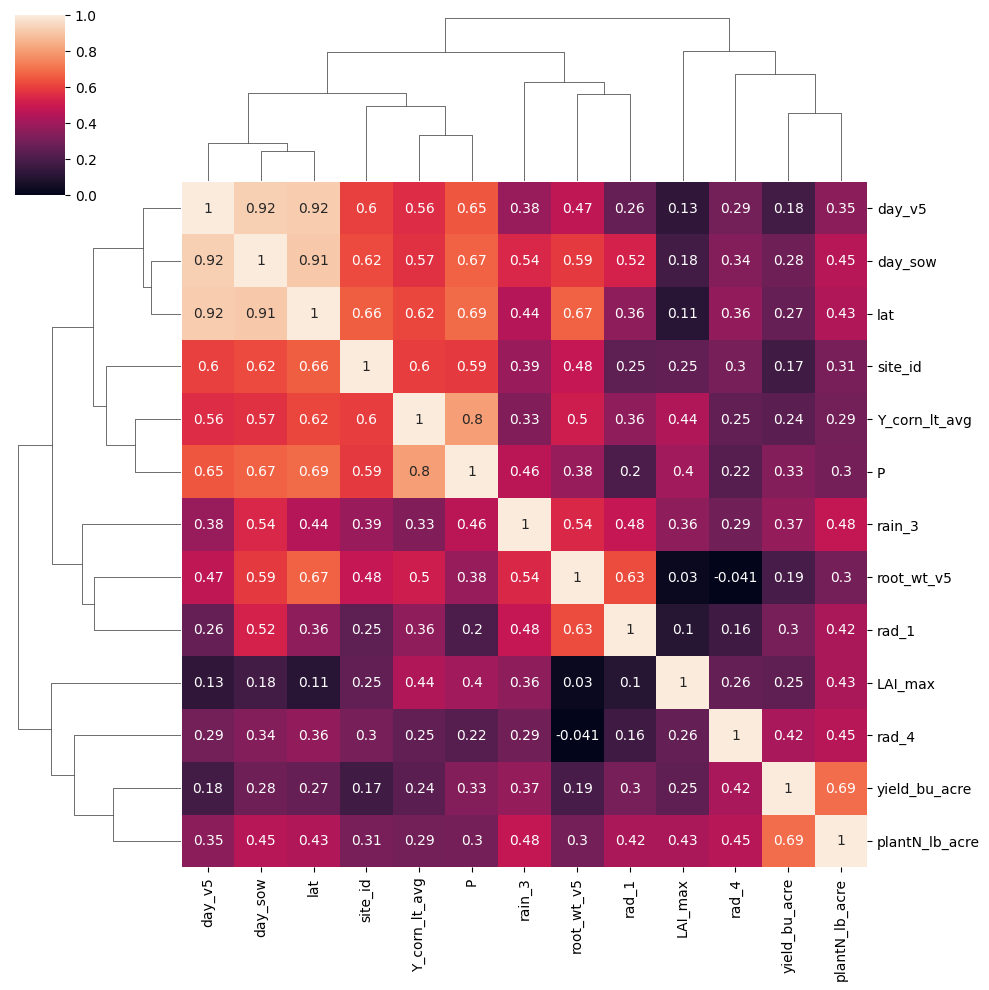

In [40]:
# Visualizing results
plt.figure(figsize = (14,12))
sns.clustermap(corr, vmin = 0, vmax = 1, annot = True)
plt.show()

In [41]:
df.head()

site_id  LAI_max  day_sow  day_v5  root_wt_v5  rain_3  rad_1  rad_4  \
0        6  3.16400    102.0   136.0       713.9    64.0  11.67  20.27   
1       24  3.21598    101.0   136.0       727.7    75.0  11.63  20.28   
2       26  3.10600    102.0   137.0       840.3    52.0  11.29  17.00   
3       42  3.21598    101.0   137.0       749.1    64.0  11.50  20.28   
4       60  3.17400    101.0   136.0       693.5    61.0  11.64  20.49   

   Y_corn_lt_avg    lat       P  yield_bu_acre  plantN_lb_acre  
0        11820.0  39.15  1383.0            3.7            13.3  
1        11930.0  39.04  1400.0            4.2            15.4  
2        11330.0  39.06  1470.0          -13.3            -4.5  
3        11700.0  39.01  1425.0            3.5            12.5  
4        11530.0  39.08  1496.0            6.0            20.4

## Task 4
Train supervised Machine Learning models
We will train the following machine learning model to fit the dataset using the predictors features to finally predict results to determine the target variables. We will train different models to perform prediction on determing `Yields` and `N_lb_acre` 
The different ML models that would be trained compared on our dataset are: 
1. Linear Regression
2. Decision Tree
3. Random Forest
4. XGBoost
5. Deep Learning


<b>Regression Evaluation Metrics</b>

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

MAE is the easiest to understand, because it's the average error.
MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.
All of these are loss functions, because we want to minimize them.

### 1. Linear regression
a) Training a model to predict `yield_bu_acre`

In [42]:
df.columns

Index(['site_id', 'LAI_max', 'day_sow', 'day_v5', 'root_wt_v5', 'rain_3',
       'rad_1', 'rad_4', 'Y_corn_lt_avg', 'lat', 'P', 'yield_bu_acre',
       'plantN_lb_acre'],
      dtype='object')

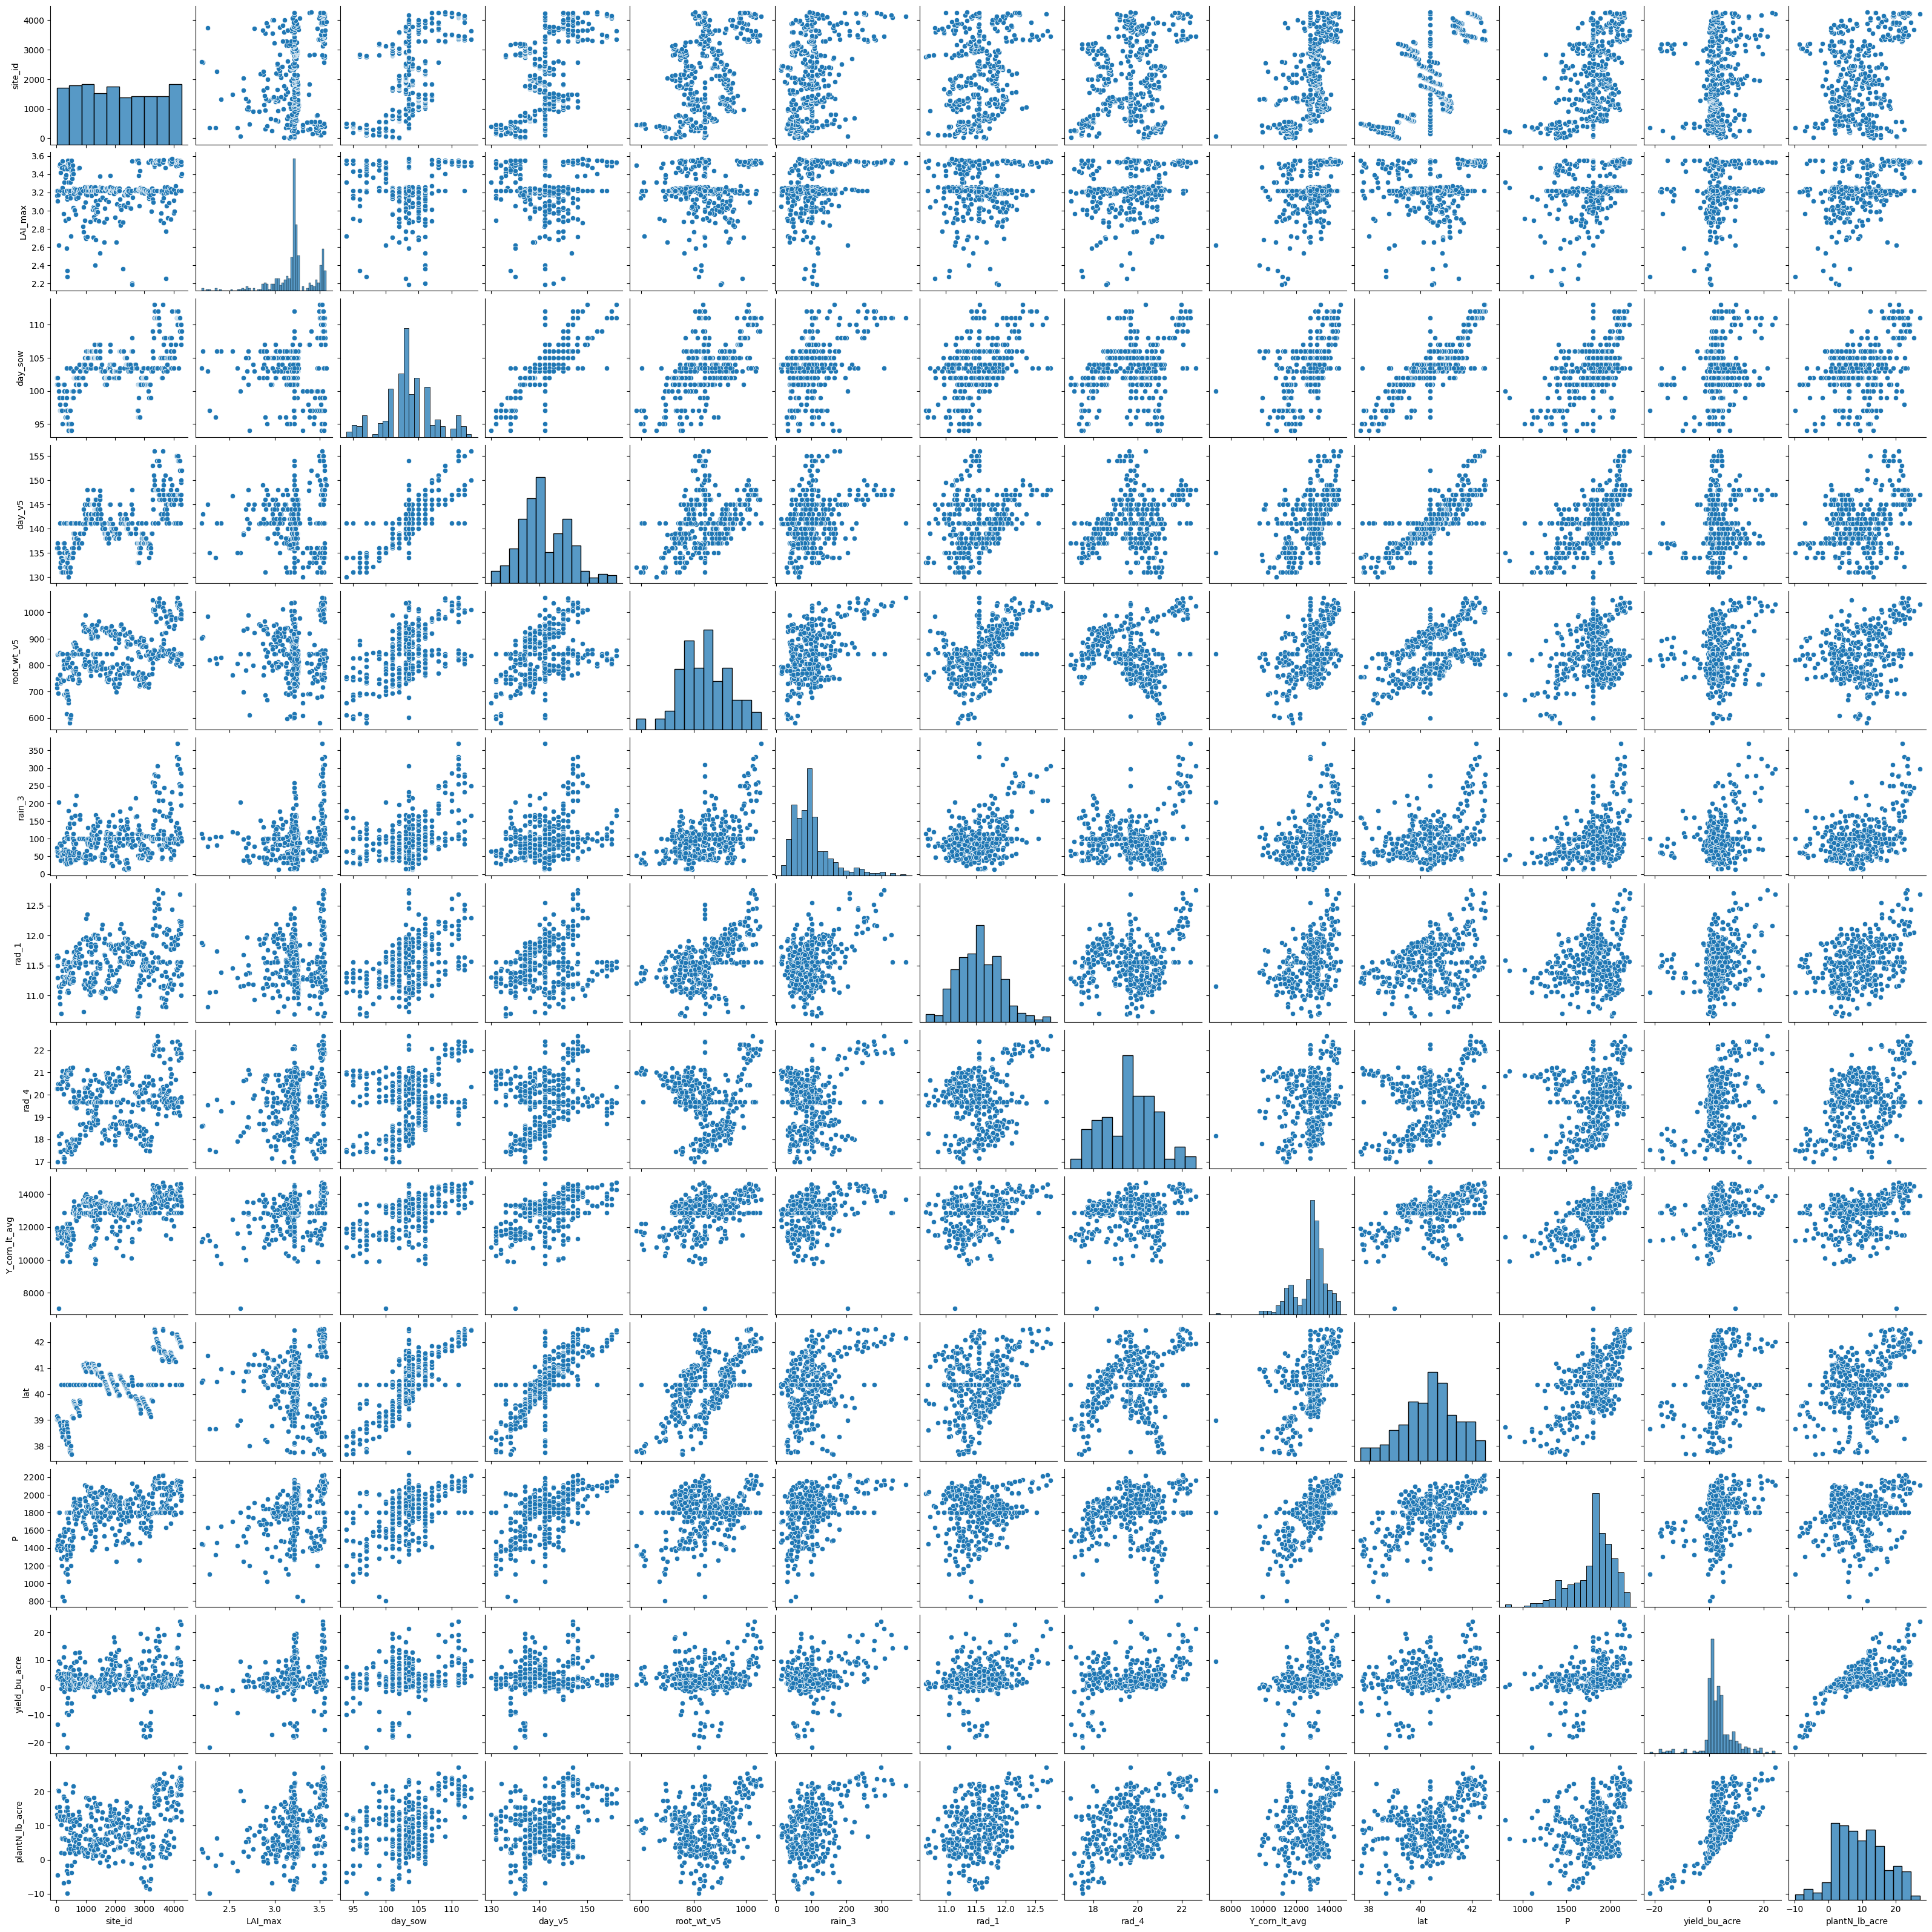

In [43]:
sns.pairplot(df)

In [44]:
X = df.iloc[:, 0:-2]

# Target variable 1
y1 = df['yield_bu_acre']

# Target variable 2
y2 = df['plantN_lb_acre']

In [45]:
# Using features to train a LR model to predict 'yield_bu_acre'
# We will split the dataset into training and test sets in order to train and evaluate our Linear Regression (LR) model
from sklearn.model_selection import train_test_split

# Splitting the dataset into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.2, random_state=101)

In [46]:
# Importing LR model from sklearn library
from sklearn.linear_model import LinearRegression

# Instantiating LR model
lm = LinearRegression()

# Training our LR model using fit function
lm.fit(X_train, y_train)

LinearRegression()

In [47]:
# Displaying the intercept
lm.intercept_

-57.260511838374185

In [48]:
# Displaying the coefficients
lm.coef_

array([-5.81180417e-04,  2.12939627e+00, -8.88646627e-02,  2.96454066e-02,
        7.18767689e-03,  9.27185021e-03,  3.34745267e+00,  1.81056365e+00,
       -1.08275131e-03, -5.83085021e-01,  8.85353628e-03])

In [49]:
# Displaying the coefficients with their respective value
cdf = pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])
cdf

Coeff
site_id       -0.000581
LAI_max        2.129396
day_sow       -0.088865
day_v5         0.029645
root_wt_v5     0.007188
rain_3         0.009272
rad_1          3.347453
rad_4          1.810564
Y_corn_lt_avg -0.001083
lat           -0.583085
P              0.008854

### Performing prediction to check performance to predict yield_bu/acre

In [50]:
# Performing prediction on test set from our trained lR model
predictions = lm.predict(X_test)

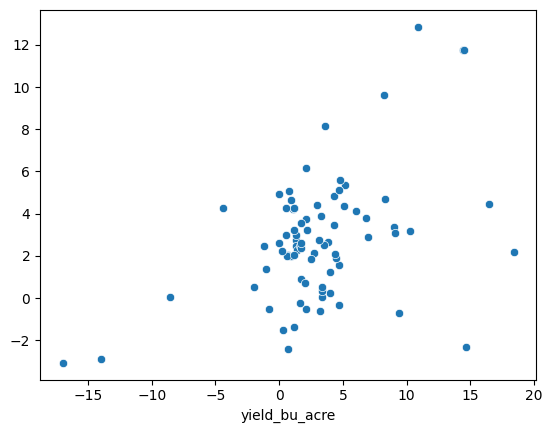

In [51]:
# Checking how well did the lm performed
sns.scatterplot(x = y_test, y = predictions)
plt.show()

Calculating loss

In [53]:
from sklearn import metrics

In [54]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 3.2887421337033387
MSE: 22.57449779871164
RMSE: 4.751262758331898


In [55]:
# Using features to train a LR model to predict 'plantN_lb_acre'
# We will split the dataset into training and test sets in order to train and evaluate our Linear Regression (LR) model
from sklearn.model_selection import train_test_split

# Splitting the dataset into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.2, random_state=101)

# Importing LR model from sklearn library
from sklearn.linear_model import LinearRegression

# Instantiating LR model
lm = LinearRegression()

# Training our LR model using fit function
lm.fit(X_train, y_train)

# Displaying the intercept
print(lm.intercept_)

# Displaying the coefficients
print(lm.coef_)

-167.61941835746427
[-3.89287532e-05  1.03587727e+01  1.16951755e-02 -2.29203858e-02
 -5.87006137e-05  1.68545153e-02  5.23001031e+00  1.44316162e+00
 -1.69256888e-03  1.96412819e+00 -1.22068483e-03]


In [56]:
# Displaying the coefficients with their respective value
cdf = pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])
cdf

Coeff
site_id        -0.000039
LAI_max        10.358773
day_sow         0.011695
day_v5         -0.022920
root_wt_v5     -0.000059
rain_3          0.016855
rad_1           5.230010
rad_4           1.443162
Y_corn_lt_avg  -0.001693
lat             1.964128
P              -0.001221

### Performing prediction to check performance to predict plantN_lb_acre

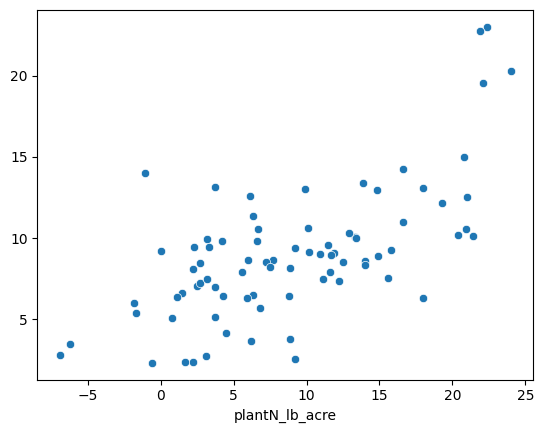

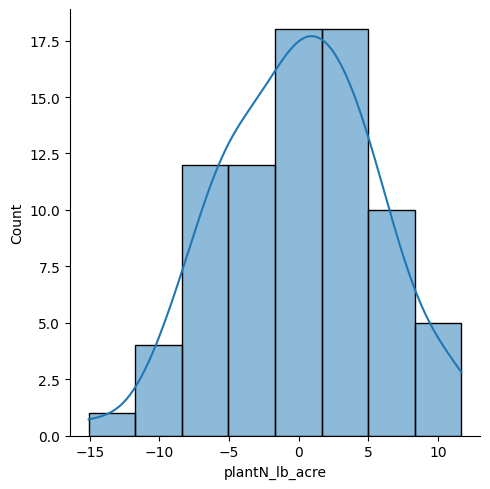

In [57]:
# Performing prediction on test set from our trained lR model
predictions = lm.predict(X_test)

# Checking how well did the lm performed
sns.scatterplot(x = y_test, y = predictions)
plt.show()

In [58]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 4.367369458763514
MSE: 29.199930149105843
RMSE: 5.403695971194701


Using PCA to perform dimensionality reduction and then training a LR model to fit on the training dataset, the model performs better than the LR model trained without performing dimensionality reduction

In [59]:
from sklearn.decomposition import PCA

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.2, random_state=42)

# Scale the data (this is necessary for PCA to work well)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Perform PCA on the training set
pca = PCA()
pca.fit(X_train)

# Choose the number of principal components to keep based on the explained variance ratio
n_components = 4

cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
selected_components = np.argwhere(cumulative_variance_ratio >= 0.95)[0][0] + 1
if selected_components < n_components:
    n_components = selected_components
print(f"Selected {n_components} principal components")

# Project the training set and test set onto the selected principal components
X_train_pca = pca.transform(X_train)[:, :n_components]
X_test_pca = pca.transform(X_test)[:, :n_components]

# Train a linear regression model on the lower-dimensional training set
lr = LinearRegression()
lr.fit(X_train_pca, y_train)

# Test the linear regression model on the lower-dimensional test set
y_pred = lr.predict(X_test_pca)
# mse = mean_squared_error(y_test, y_pred)
# print(f"Mean squared error on test set: {mse:.2f}")

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Selected 4 principal components
MAE: 3.422848403076567
MSE: 25.2629518579263
RMSE: 5.026226403369261


### 2. Decision Tree

In [60]:
X = df.iloc[:, 0:-2]

# Target variable 1
y1 = df['yield_bu_acre']

# Target variable 2
y2 = df['plantN_lb_acre']

In [61]:
# Fiting the model to train on 'Yield_bu_acre'

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

Error = []

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.2, random_state=42)

# initialize the scaler and scale the training and testing data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

for i in range(3, 15):

    # initialize the decision tree regressor model
    regressor = DecisionTreeRegressor(max_depth=i)

    # fit the model on the training data
    regressor.fit(X_train, y_train)

    # predict the labels for the test set
    y_pred = regressor.predict(X_test)

    # calculate the mean squared error of the predictions
    mse = mean_squared_error(y_test, y_pred)
    Error.append(round(mse,2))

Error = np.array(Error)
print(Error.min())
Error.argmin()

21.33


1

In [62]:
# Fiting the model to train on 'plantN_lb_acre'

from sklearn.tree import DecisionTreeRegressor
Error = []

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.2, random_state=42)

# initialize the scaler and scale the training and testing data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

for i in range(3, 15):

    # initialize the decision tree regressor model
    regressor = DecisionTreeRegressor(max_depth=i)

    # fit the model on the training data
    regressor.fit(X_train, y_train)

    # predict the labels for the test set
    y_pred = regressor.predict(X_test)

    # calculate the mean squared error of the predictions
    mse = mean_squared_error(y_test, y_pred)
    Error.append(round(mse,2))

Error = np.array(Error)
print(Error.min())
Error.argmin()

26.34


2

### 3. Random forest

In [63]:
X = df.iloc[:, 0:-2]

# Target variable 1
y1 = df['yield_bu_acre']

# Target variable 2
y2 = df['plantN_lb_acre']

In [64]:
# Fiting the model to train on 'yield_bu_acre'

from sklearn.ensemble import RandomForestRegressor

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.2, random_state=42)

# initialize the scaler and scale the training and testing data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

RF = []

# initialize the random forest regressor model
for i in range(1,150):

    regressor = RandomForestRegressor(n_estimators=250, max_depth=i)

    # fit the model on the training data
    regressor.fit(X_train, y_train)

    # predict the labels for the test set
    y_pred = regressor.predict(X_test)

    # calculate the mean squared error of the predictions
    mse = mean_squared_error(y_test, y_pred)
    RF.append(mse)
#     print(f"Mean Squared Error: {mse}")
RF = np.array(RF)
print(RF.min())
RF.argmin()

19.185612778079996


135

In [65]:
imp = regressor.feature_importances_
for i, v in enumerate(imp):
    print('Feature: ', df.columns[i], ' Score is: ', v)

Feature:  site_id  Score is:  0.15405888370946805
Feature:  LAI_max  Score is:  0.060757392846192027
Feature:  day_sow  Score is:  0.01875867568761356
Feature:  day_v5  Score is:  0.05510478021663001
Feature:  root_wt_v5  Score is:  0.07475341476177037
Feature:  rain_3  Score is:  0.190003117502217
Feature:  rad_1  Score is:  0.05306009507949204
Feature:  rad_4  Score is:  0.19030275568142976
Feature:  Y_corn_lt_avg  Score is:  0.037387615568397425
Feature:  lat  Score is:  0.05789801348686753
Feature:  P  Score is:  0.10791525545992221


In [66]:
# Fiting the model to train on 'plantN_lb_acre'

from sklearn.ensemble import RandomForestRegressor

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.2, random_state=42)

# initialize the scaler and scale the training and testing data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

RF = []

# initialize the random forest regressor model
for i in range(1,150):

    regressor = RandomForestRegressor(n_estimators=250, max_depth=i)

    # fit the model on the training data
    regressor.fit(X_train, y_train)

    # predict the labels for the test set
    y_pred = regressor.predict(X_test)

    # calculate the mean squared error of the predictions
    mse = mean_squared_error(y_test, y_pred)
    RF.append(mse)
#     print(f"Mean Squared Error: {mse}")
RF = np.array(RF)
print(RF.min())
RF.argmin()

20.438074886


27

In [67]:
imp = regressor.feature_importances_
for i, v in enumerate(imp):
    print('Feature: ', df.columns[i], ' Score is: ', v)

Feature:  site_id  Score is:  0.11267277821368746
Feature:  LAI_max  Score is:  0.07451000958117251
Feature:  day_sow  Score is:  0.17272902009657548
Feature:  day_v5  Score is:  0.0256900519983322
Feature:  root_wt_v5  Score is:  0.0762724015183233
Feature:  rain_3  Score is:  0.05965370879392965
Feature:  rad_1  Score is:  0.0665104059772918
Feature:  rad_4  Score is:  0.09781554252468293
Feature:  Y_corn_lt_avg  Score is:  0.048399775849595365
Feature:  lat  Score is:  0.20909339157211784
Feature:  P  Score is:  0.05665291387429123


### 4. XGBoost

In [68]:
X = df.iloc[:, 0:-2]

# Target variable 1
y1 = df['yield_bu_acre']

# Target variable 2
y2 = df['plantN_lb_acre']

In [69]:
# Fiting the model to train on 'yield_bu_acre'
from xgboost import XGBRegressor

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.2, random_state=42)

# initialize the scaler and scale the training and testing data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

RF = []

# initialize the random forest regressor model
for i in range(1,150):

    regressor = XGBRegressor(n_estimators=250, max_depth=i)

    # fit the model on the training data
    regressor.fit(X_train, y_train)

    # predict the labels for the test set
    y_pred = regressor.predict(X_test)

    # calculate the mean squared error of the predictions
    mse = mean_squared_error(y_test, y_pred)
    RF.append(mse)
#     print(f"Mean Squared Error: {mse}")
RF = np.array(RF)
print(RF.min())
RF.argmin()

20.538213872474003


3

In [70]:
imp = regressor.feature_importances_
for i, v in enumerate(imp):
    print('Feature: ', df.columns[i], ' Score is: ', v)

Feature:  site_id  Score is:  0.06651011
Feature:  LAI_max  Score is:  0.05196535
Feature:  day_sow  Score is:  0.026103636
Feature:  day_v5  Score is:  0.09374075
Feature:  root_wt_v5  Score is:  0.048161104
Feature:  rain_3  Score is:  0.27914223
Feature:  rad_1  Score is:  0.042976644
Feature:  rad_4  Score is:  0.15385762
Feature:  Y_corn_lt_avg  Score is:  0.032968447
Feature:  lat  Score is:  0.048582528
Feature:  P  Score is:  0.15599158


In [71]:
# Fiting the model to train on 'plantN_lb_acre'

from xgboost import XGBRegressor

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.2, random_state=42)

# initialize the scaler and scale the training and testing data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

RF = []

# initialize the random forest regressor model
for i in range(1,150):

    regressor = XGBRegressor(n_estimators=250, max_depth=i)

    # fit the model on the training data
    regressor.fit(X_train, y_train)

    # predict the labels for the test set
    y_pred = regressor.predict(X_test)

    # calculate the mean squared error of the predictions
    mse = mean_squared_error(y_test, y_pred)
    RF.append(mse)
#     print(f"Mean Squared Error: {mse}")
RF = np.array(RF)
print(RF.min())
RF.argmin()

20.492783655312444


16

In [72]:
imp = regressor.feature_importances_
for i, v in enumerate(imp):
    print('Feature: ', df.columns[i], ' Score is: ', v)

Feature:  site_id  Score is:  0.031286128
Feature:  LAI_max  Score is:  0.053919293
Feature:  day_sow  Score is:  0.40763152
Feature:  day_v5  Score is:  0.030705698
Feature:  root_wt_v5  Score is:  0.05372712
Feature:  rain_3  Score is:  0.044856846
Feature:  rad_1  Score is:  0.036756653
Feature:  rad_4  Score is:  0.07630828
Feature:  Y_corn_lt_avg  Score is:  0.026356893
Feature:  lat  Score is:  0.20766395
Feature:  P  Score is:  0.030787656


### 5. Deep Learning

In [73]:
from sklearn.preprocessing import MinMaxScaler

# Neural Net modules
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [74]:
X = df.iloc[:, 0:-2]

# Target variable 1
y1 = df['yield_bu_acre']

# Target variable 2
y2 = df['plantN_lb_acre']

In [75]:
# our target variable is 'yield_bu_acre'

# convert to numpy array
X = np.array(X)
y = np.array(y1)

# split into X_train and X_test
# always split into X_train, X_test first THEN apply minmax scaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# use minMax scaler
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

(320, 11) (80, 11) (320,) (80,)


In [76]:
# build the model!
model = Sequential()
model.add(Dense(1000, input_shape=(X_train.shape[1],), activation='relu')) # (features,)
model.add(Dense(500, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='linear')) # output node
model.summary() # see what your model looks like

# compile the model
model.compile(optimizer='rmsprop', loss='mse', metrics=['mse'])

# early stopping callback
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=50,
                   restore_best_weights = True)

# fit the model!
# attach it to a new variable called 'history' in case
# to look at the learning curves
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    callbacks=[es],
                    epochs=5000,
                    batch_size=50,
                    verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              12000     
                                                                 
 dense_1 (Dense)             (None, 500)               500500    
                                                                 
 dense_2 (Dense)             (None, 500)               250500    
                                                                 
 dense_3 (Dense)             (None, 250)               125250    
                                                                 
 dense_4 (Dense)             (None, 1)                 251       
                                                                 
Total params: 888,501
Trainable params: 888,501
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5000
7/7 [==============================] 

Epoch 114/5000
7/7 [==============================] - 0s 17ms/step - loss: 6.1703 - mse: 6.1703 - val_loss: 22.5406 - val_mse: 22.5406
Epoch 115/5000
7/7 [==============================] - 0s 18ms/step - loss: 6.3092 - mse: 6.3092 - val_loss: 12.9954 - val_mse: 12.9954
Epoch 116/5000
7/7 [==============================] - 0s 16ms/step - loss: 5.4996 - mse: 5.4996 - val_loss: 17.1643 - val_mse: 17.1643
Epoch 117/5000
7/7 [==============================] - 0s 14ms/step - loss: 7.2372 - mse: 7.2372 - val_loss: 13.3806 - val_mse: 13.3806
Epoch 118/5000
7/7 [==============================] - 0s 14ms/step - loss: 6.9758 - mse: 6.9758 - val_loss: 26.4439 - val_mse: 26.4439
Epoch 119/5000
7/7 [==============================] - 0s 13ms/step - loss: 7.1344 - mse: 7.1344 - val_loss: 32.5663 - val_mse: 32.5663
Epoch 120/5000
7/7 [==============================] - 0s 12ms/step - loss: 6.6703 - mse: 6.6703 - val_loss: 14.7039 - val_mse: 14.7039
Epoch 121/5000
7/7 [==============================] - 0

Epoch 175/5000
7/7 [==============================] - 0s 16ms/step - loss: 2.5352 - mse: 2.5352 - val_loss: 23.6001 - val_mse: 23.6001


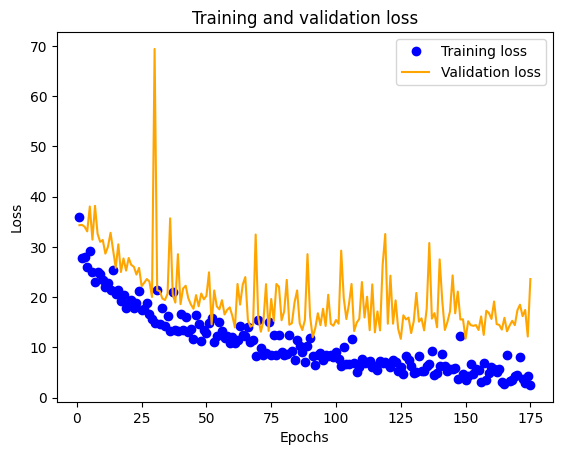

In [77]:
# let's see the training and validation accuracy by epoch
history_dict = history.history

loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this

epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [78]:
# metrics
pred = model.predict(X_test)
pred

trainpreds = model.predict(X_train)

from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_train, trainpreds)) # train
print(mean_squared_error(y_test, pred)) # test

10/10 [==============================] - 0s 2ms/step
4.12736831957892
11.70227899934003


In [79]:
X = df.iloc[:, 0:-2]

# Target variable 1
y1 = df['yield_bu_acre']

# Target variable 2
y2 = df['plantN_lb_acre']

In [80]:
# our target variable is 'yield_bu_acre'

# convert to numpy array
X = np.array(X)
y = np.array(y1)

# split into X_train and X_test
# always split into X_train, X_test first THEN apply minmax scaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# use minMax scaler
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

# build the model!
model = Sequential()
model.add(Dense(1000, input_shape=(X_train.shape[1],), activation='relu')) # (features,)
model.add(Dense(500, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='linear')) # output node
model.summary() # see what your model looks like

# compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

# early stopping callback
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=50,
                   restore_best_weights = True)

# fit the model!
# attach it to a new variable called 'history' in case
# to look at the learning curves
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    callbacks=[es],
                    epochs=5000,
                    batch_size=50,
                    verbose=1)

(320, 11) (80, 11) (320,) (80,)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1000)              12000     
                                                                 
 dense_6 (Dense)             (None, 500)               500500    
                                                                 
 dense_7 (Dense)             (None, 500)               250500    
                                                                 
 dense_8 (Dense)             (None, 250)               125250    
                                                                 
 dense_9 (Dense)             (None, 1)                 251       
                                                                 
Total params: 888,501
Trainable params: 888,501
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5000
7/7

7/7 [==============================] - 0s 12ms/step - loss: 4.2843 - mse: 4.2843 - val_loss: 13.2222 - val_mse: 13.2222
Epoch 115/5000
7/7 [==============================] - 0s 12ms/step - loss: 4.3436 - mse: 4.3436 - val_loss: 13.3575 - val_mse: 13.3575
Epoch 116/5000
7/7 [==============================] - 0s 11ms/step - loss: 5.1772 - mse: 5.1772 - val_loss: 13.3551 - val_mse: 13.3551
Epoch 117/5000
7/7 [==============================] - 0s 11ms/step - loss: 5.1831 - mse: 5.1831 - val_loss: 13.6578 - val_mse: 13.6578
Epoch 118/5000
7/7 [==============================] - 0s 13ms/step - loss: 4.3249 - mse: 4.3249 - val_loss: 12.0115 - val_mse: 12.0115
Epoch 119/5000
7/7 [==============================] - 0s 12ms/step - loss: 5.0151 - mse: 5.0151 - val_loss: 13.4261 - val_mse: 13.4261
Epoch 120/5000
7/7 [==============================] - 0s 12ms/step - loss: 4.5884 - mse: 4.5884 - val_loss: 12.1873 - val_mse: 12.1873
Epoch 121/5000
7/7 [==============================] - 0s 12ms/step - l

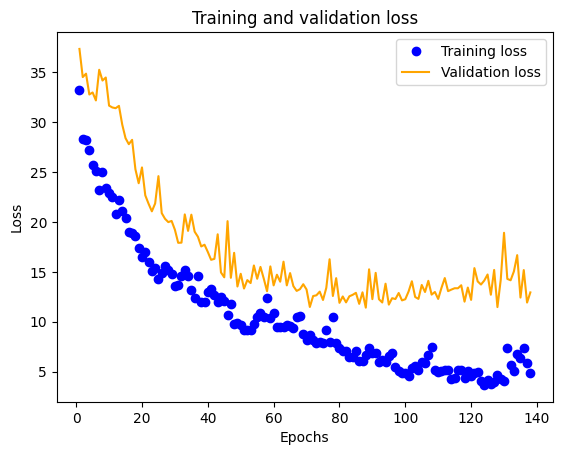

In [81]:
# let's see the training and validation accuracy by epoch
history_dict = history.history

loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this

epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [82]:
# metrics
pred = model.predict(X_test)
pred

trainpreds = model.predict(X_train)

from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_train, trainpreds)) # train
print(mean_squared_error(y_test, pred)) # test

10/10 [==============================] - 0s 2ms/step
6.772775310350281
11.411800657414043


Training a deep learning model with a lot of neurons could lead to overfitting. Overfitting leads to generation of accurate results on given dataset and the model prepared usually does not perform well on unseen dataset

In [83]:
X = df.iloc[:, 0:-2]

# Target variable 1
y1 = df['yield_bu_acre']

# Target variable 2
y2 = df['plantN_lb_acre']

In [84]:
# our target variable is 'yield_bu_acre'

# convert to numpy array
X = np.array(X)
y = np.array(y1)

# split into X_train and X_test
# always split into X_train, X_test first THEN apply minmax scaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# use minMax scaler
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

# build the model! - 9 hidden layers
model = Sequential()
model.add(Dense(1000, input_shape=(X_train.shape[1],), activation='relu')) # (features,)
model.add(Dense(500, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='linear')) # output node
model.summary() # see what your model looks like

# compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

# early stopping callback
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=50,
                   restore_best_weights = True)

# fit the model!
# attach it to a new variable called 'history' in case
# to look at the learning curves
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    callbacks=[es],
                    epochs=5000,
                    batch_size=50,
                    verbose=1)

(320, 11) (80, 11) (320,) (80,)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 1000)              12000     
                                                                 
 dense_11 (Dense)            (None, 500)               500500    
                                                                 
 dense_12 (Dense)            (None, 500)               250500    
                                                                 
 dense_13 (Dense)            (None, 500)               250500    
                                                                 
 dense_14 (Dense)            (None, 250)               125250    
                                                                 
 dense_15 (Dense)            (None, 250)               62750     
                                                                 
 dense_16 (Dense)     

Epoch 110/5000
7/7 [==============================] - 0s 13ms/step - loss: 4.9432 - mse: 4.9432 - val_loss: 13.6012 - val_mse: 13.6012
Epoch 111/5000
7/7 [==============================] - 0s 17ms/step - loss: 5.4486 - mse: 5.4486 - val_loss: 10.8954 - val_mse: 10.8954
Epoch 112/5000
7/7 [==============================] - 0s 15ms/step - loss: 5.3539 - mse: 5.3539 - val_loss: 12.0873 - val_mse: 12.0873
Epoch 113/5000
7/7 [==============================] - 0s 16ms/step - loss: 5.9952 - mse: 5.9952 - val_loss: 10.4101 - val_mse: 10.4101
Epoch 114/5000
7/7 [==============================] - 0s 15ms/step - loss: 4.7208 - mse: 4.7208 - val_loss: 12.2719 - val_mse: 12.2719
Epoch 115/5000
7/7 [==============================] - 0s 16ms/step - loss: 4.2868 - mse: 4.2868 - val_loss: 11.2643 - val_mse: 11.2643
Epoch 116/5000
7/7 [==============================] - 0s 15ms/step - loss: 4.3720 - mse: 4.3720 - val_loss: 10.5529 - val_mse: 10.5529
Epoch 117/5000
7/7 [==============================] - 0

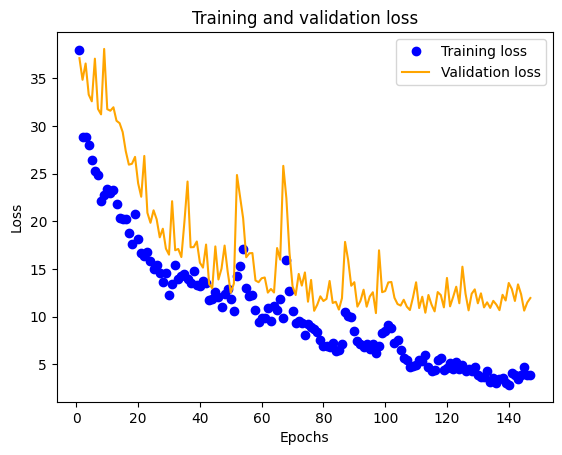

In [85]:
# let's see the training and validation accuracy by epoch
history_dict = history.history

loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this

epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [86]:
# metrics
pred = model.predict(X_test)
pred

trainpreds = model.predict(X_train)

from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_train, trainpreds)) # train
print(mean_squared_error(y_test, pred)) # test

10/10 [==============================] - 0s 3ms/step
6.28459170136252
10.36985667153942


In [87]:
X = df.iloc[:, 0:-2]

# Target variable 1
y1 = df['yield_bu_acre']

# Target variable 2
y2 = df['plantN_lb_acre']

In [88]:
# our target variable is 'plantN_lb_acre'

# convert to numpy array
X = np.array(X)
y = np.array(y2)

# split into X_train and X_test
# always split into X_train, X_test first THEN apply minmax scaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# use minMax scaler
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

# build the model!
model = Sequential()
model.add(Dense(1000, input_shape=(X_train.shape[1],), activation='relu')) # (features,)
model.add(Dense(500, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='linear')) # output node
model.summary() # see what your model looks like

# compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

# early stopping callback
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=50,
                   restore_best_weights = True)

# fit the model!
# attach it to a new variable called 'history' in case
# to look at the learning curves
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    callbacks=[es],
                    epochs=5000,
                    batch_size=50,
                    verbose=1)

(320, 11) (80, 11) (320,) (80,)
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 1000)              12000     
                                                                 
 dense_20 (Dense)            (None, 500)               500500    
                                                                 
 dense_21 (Dense)            (None, 500)               250500    
                                                                 
 dense_22 (Dense)            (None, 250)               125250    
                                                                 
 dense_23 (Dense)            (None, 1)                 251       
                                                                 
Total params: 888,501
Trainable params: 888,501
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5000
7/7

7/7 [==============================] - 0s 12ms/step - loss: 15.1404 - mse: 15.1404 - val_loss: 15.5833 - val_mse: 15.5833
Epoch 54/5000
7/7 [==============================] - 0s 10ms/step - loss: 14.1184 - mse: 14.1184 - val_loss: 14.3116 - val_mse: 14.3116
Epoch 55/5000
7/7 [==============================] - 0s 12ms/step - loss: 15.1835 - mse: 15.1835 - val_loss: 14.2610 - val_mse: 14.2610
Epoch 56/5000
7/7 [==============================] - 0s 12ms/step - loss: 14.7836 - mse: 14.7836 - val_loss: 15.3667 - val_mse: 15.3667
Epoch 57/5000
7/7 [==============================] - 0s 14ms/step - loss: 14.1159 - mse: 14.1159 - val_loss: 14.3092 - val_mse: 14.3092
Epoch 58/5000
7/7 [==============================] - 0s 14ms/step - loss: 12.9679 - mse: 12.9679 - val_loss: 14.2616 - val_mse: 14.2616
Epoch 59/5000
7/7 [==============================] - 0s 12ms/step - loss: 13.4970 - mse: 13.4970 - val_loss: 16.0842 - val_mse: 16.0842
Epoch 60/5000
7/7 [==============================] - 0s 13ms/s

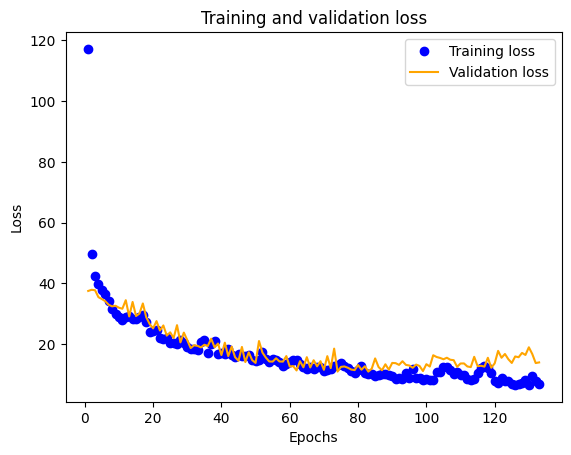

In [89]:
# let's see the training and validation accuracy by epoch
history_dict = history.history

loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this

epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

3/3 [==============================] - 0s 0s/step


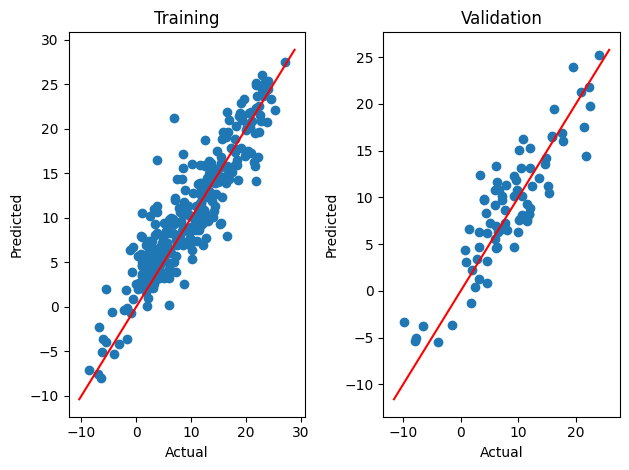

In [90]:
# scatterplot of actual vs. pred
# specify the dimensions 
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=model.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_test, y=model.predict(X_test)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# show the plot
plt.show()

In [91]:
# metrics
pred = model.predict(X_test)
pred

trainpreds = model.predict(X_train)

from sklearn.metrics import mean_squared_error, root
print(mean_squared_error(y_train, trainpreds)) # train
print(mean_squared_error(y_test, pred)) # test

10/10 [==============================] - 0s 3ms/step
10.040161190697786
10.969793577750563


### Summary table
<b>Creating a dataframe and storing the MSE calculated by the trained ML model by performing prediction on test dataset, this helps to estimate the generalizability of the trained model.</b>

In [92]:
summary_df = pd.DataFrame({'yield_bu_acre': [22.62, 20.8, 19.25, 17.71, 10.37], 
                           'plantN_lb_acre': [29.22, 27.49, 20.13, 20.98, 10.83]}, 
                           index = ['Linear Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'Deep Learning'])
summary_df

yield_bu_acre  plantN_lb_acre
Linear Regression          22.62           29.22
Decision Tree              20.80           27.49
Random Forest              19.25           20.13
XGBoost                    17.71           20.98
Deep Learning              10.37           10.83

Deep learning model performs best and generates the minimum MSE value on the test dataset.

# Task 5

Pick the best-performing model(s) for each target and use it to address the following questions:

<b> a. Are there key site characteristics (or grouping of site characteristics) that are most strongly associated with whether a site would be responsive to 40 lb/ac of N fertilizer?</b><br>
Ans. The most important features on which I trained the ML models using the original dataset after data wrangling/exploratory analysis were - `rad_4`, `rain_3`, `P`, and `day_sow`. According to our analysis these features are most strongly associated with whether a site would be responsive to 40 lb/ac of N fertilizer.<br>

<b> b. Is there any discernible pattern in the learned relationships between the target and the most important features?</b><br>
Ans.We generated the importance of different features that were used to train the ML models and observed the following results.<br> `yield_bu_acre` - The features `rad_4`, `P`, and `rain3` features were the most signifcant that led to the better trainign of the model whereas while training ML model for `plantN_b_acre` - we observed that the `day_sow` and `rad_4` were the most significant features while training. <br>
If we were to define the most significant/important feature amongst the features used to train the model - than it would be `rad_4` - Average Solar radiation between R1 and R3 growth stages of corn <br>
 
<b> c. If we were to repeat this experiment in the future, what would be the minimum number of sites needed to train a reasonably accurate model?</b><br>
Ans. The Deep learning model help us achieve good results while predicting outputs on the unseen test dataset leading to satisfying scores that states that our model genralizes well. To train a robust ML model that does not undergo overfitting and generalizes well on unseen dataset, minimum number of 1000 sitescould help to train a robust predictive model that could generate better results